In [24]:

# Importing Required Libraries


import pandas as pd                 # Data manipulation and analysis
import numpy as np                  # Numerical computations
import matplotlib.pyplot as plt     # Visualization (basic plots)
# Scikit-learn tools
from sklearn.model_selection import train_test_split   # Train/test split
from sklearn.linear_model import LinearRegression      # Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score  # Model evaluation metrics


In [25]:

# Load Dataset

# Load the housing dataset (CSV file should be in the same folder as this notebook)
housing_df = pd.read_csv("housing.csv")

# Display the first 5 rows to understand the structure
housing_df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:

# Dataset Overview

# Shape of dataset (rows, columns)
print("Dataset Shape:", housing_df.shape)

# Dataset summary (columns, data types, null values, etc.)
housing_df.info()


Dataset Shape: (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [27]:

# Handle Categorical Variables
# Convert categorical columns into numerical using One-Hot Encoding
# drop_first=True avoids dummy variable trap
housing_encoded = pd.get_dummies(housing_df, drop_first=True)

# Show first 5 rows of transformed data
housing_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [28]:
# Split Features and Target

# 'price' is the target column
X = housing_encoded.drop("price", axis=1)   # Independent variables (features)
y = housing_encoded["price"]                # Dependent variable (target)

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)


Features Shape: (545, 13)
Target Shape: (545,)


In [29]:
# Train/Test Split

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (436, 13) (436,)
Testing set shape: (109, 13) (109,)


In [30]:
# Train Linear Regression Model
# Create Linear Regression model object
lin_reg_model = LinearRegression()

# Train (fit) the model on training data
lin_reg_model.fit(X_train, y_train)

print("Linear Regression Model Trained Successfully!")


Linear Regression Model Trained Successfully!


In [31]:

# Predictions & Model Evaluation

# Predict house prices for test set
y_pred = lin_reg_model.predict(X_test)

# Evaluate performance using MSE and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Custom accuracy: % of predictions within 10% tolerance of actual price
tolerance = 0.10
within_tolerance = np.abs((y_pred - y_test) / y_test) <= tolerance
custom_acc = np.mean(within_tolerance)

print("Custom Accuracy (within ±10% of actual):", round(custom_acc * 100, 2), "%")


Mean Squared Error (MSE): 1586758224575.697
R² Score: 0.6221280430074471
Custom Accuracy (within ±10% of actual): 36.7 %


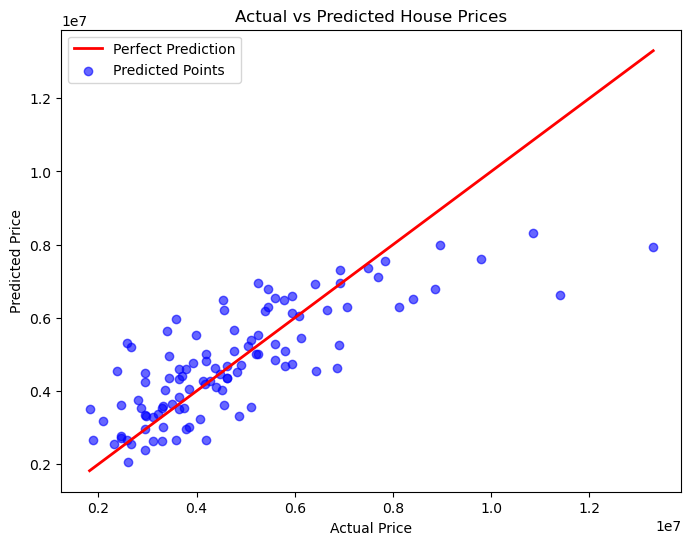

In [32]:
# Visualization - Actual vs Predicted Prices

plt.figure(figsize=(8,6))

# Perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Perfect Prediction")

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted Points")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


In [33]:
# Predict Price for New House (Example 1)

# Example house with different values
new_house = pd.DataFrame({
    "area": [6200],                  # Smaller area
    "bedrooms": [3],                 # 3 bedrooms
    "bathrooms": [2],                # 2 bathrooms
    "stories": [1],                  # Single story
    "mainroad": ["no"],              # Not on main road
    "guestroom": ["yes"],            # Has guest room
    "basement": ["no"],              # No basement
    "hotwaterheating": ["no"],       # No hot water heating
    "airconditioning": ["no"],       # No air conditioning
    "parking": [1],                  # 1 parking spot
    "prefarea": ["no"],              # Not in preferred area
    "furnishingstatus": ["semi-furnished"]  # Semi-furnished
})

# Apply same encoding as training data
new_house_encoded = pd.get_dummies(new_house)

# Align with training features
new_house_encoded = new_house_encoded.reindex(columns=X.columns, fill_value=0)

# Predict price
predicted_price = lin_reg_model.predict(new_house_encoded)

print("Predicted Price for this New House:", round(predicted_price[0], 2))


Predicted Price for this New House: 4861821.34
